
### Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements (in millions of square km) from the [National Snow & Ice Data Center](https://nsidc.org), provided in file "SeaIce.txt".

We perform the following processing steps:
1. Read and clean the data.
2. Calculate Sea Ice Extent (SIE) anomalies and visualize its temporal trend.
3. Compute the SIE temporal trend as a simple linear regression (OLS) and quantitatively evaluate it.
4. Estimate the sea ice extent for 2025.


### 1. Read and clean the data.
Load the monthly sea ice extent (SIE) monthly data from provided in the file 'SeaIce.txt'. Note variables ``extent`` (SIE) and ``area`` should be greater or equal than zero. Detect possible outliers and clean the data.  

In [250]:
#your solution here

import pandas as pd
import seaborn as sns
import numpy as np

dfSeaIce = pd.read_csv('./SeaIce.txt', delim_whitespace=True, index_col= 0)

dfSeaIce.head()

,mo,data_type,region,extent,area
year,,,,,
1979,1,Goddard,N,15.54,12.33
1980,1,Goddard,N,14.96,11.85
1981,1,Goddard,N,15.03,11.82
1982,1,Goddard,N,15.26,12.11
1983,1,Goddard,N,15.10,11.92


### 2. Calculate SIE anomalies and visualize its temporal trend.

Visualize whether there is a monthly dependence of SIE, explore the linear relationship using ``lmplot``.
Compute the mean and variance of SIE for each month. ¿Which are the months with higher variance?

/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


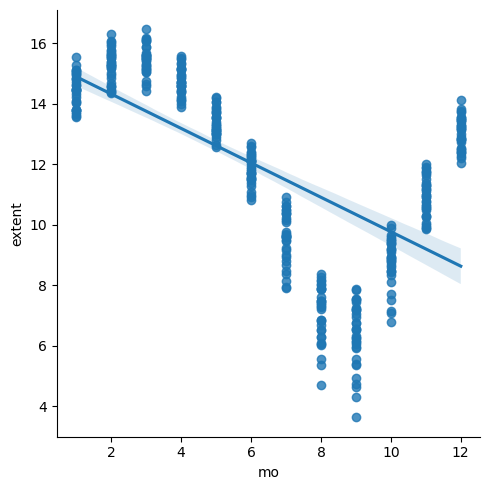

In [251]:
#your response here

dfSeaIce = dfSeaIce.drop(dfSeaIce.index[(dfSeaIce.extent < 0)])
dfSeaIce = dfSeaIce.drop(dfSeaIce.index[(dfSeaIce.area < 0)])


sns.lmplot(x = "mo", y = "extent", data = dfSeaIce)


In [252]:
#mean and variance of each month

medias = np.empty([])
varianzas = np.empty([])

for i in dfSeaIce['mo'].unique():
    medias = np.append(medias, dfSeaIce[dfSeaIce['mo'] == i]['extent'].mean())
    varianzas = np.append(varianzas, dfSeaIce[dfSeaIce['mo'] == i]['extent'].var())


medias = medias[1:]
varianzas = varianzas[1:]

print(medias, '\n', varianzas)

[14.45823529 15.26588235 15.45848485 14.73545455 13.37454545 11.83363636
  9.57636364  7.08151515  6.33939394  8.77454545 10.92705882 13.03823529] 
 [0.29794831 0.28974011 0.23160076 0.21177557 0.19323807 0.24614261
 0.71048636 0.84542576 1.13805587 0.64765057 0.41076684 0.27730588]


In [253]:
print(f'El mes con la mayor media es el mes {np.argmax(medias)+1} con una extensión de {np.max(medias)}')
print(f'El mes con la mayor varianza es el mes {np.argmax(varianzas)+1} con una extensión de {np.max(varianzas)}')

El mes con la mayor media es el mes 3 con una extensión de 15.45848484848485
El mes con la mayor varianza es el mes 9 con una extensión de 1.1380558712121214


Calculate SIE anomalies as the difference between the extent for the month in question and the mean for that month based on the January 1981 to December 2010 data. Then convert it to percent difference by dividing it by the 1981-2010 average for that month and then multiplying by 100.

Example using June 2012:
The June mean extent, based on 1981 to 2010 data, is 11.89 million square km. This is the average of all the values in the extent column of the June Monthly Extent file from the 1981 to 2010 rows. The June 2012 anomaly is the difference between the extent value for June 2012 which is 10.92 million square km and the 1981-2010 June mean extent: 10.92 M sq km - 11.89 M sq km = -0.97 M sq km. The percent difference is then computed: (-0.97 / 11.89) X 100 = -8.16%.

Use the SIE anomaly for the rest of the exercise.

In [254]:
#your response here
dfSeaIce_81_10 = dfSeaIce[(dfSeaIce.index >= 1981) & (dfSeaIce.index <= 2010)]

dfSeaIce_81_10


,mo,data_type,region,extent,area
year,,,,,
1981,1,Goddard,N,15.03,11.82
1982,1,Goddard,N,15.26,12.11
1983,1,Goddard,N,15.10,11.92
1984,1,Goddard,N,14.61,11.60
1985,1,Goddard,N,14.86,11.60
...,...,...,...,...,...
2006,12,Goddard,N,12.27,10.10
2007,12,Goddard,N,12.39,10.11
2008,12,Goddard,N,12.52,10.64


In [255]:
# Compute the 1981-2010 monthly means. Thirty years is considered a standard baseline period for weather and climate.
medias_81_10 = dfSeaIce_81_10.groupby('mo')['extent'].mean()

print(type(medias_81_10))

<class 'pandas.core.series.Series'>


In [256]:
medias_array = medias_81_10.values

print(medias_array)

dfSeaIce_81_10['anomalias'] = dfSeaIce_81_10['extent'] - medias_array[dfSeaIce_81_10['mo']-1]

dfSeaIce_81_10


[14.50821429 15.30892857 15.45321429 14.71678571 13.36535714 11.86142857
  9.67392857  7.18392857  6.44785714  8.87142857 10.94642857 13.03357143]


/tmp/ipykernel_22477/498589056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSeaIce_81_10['anomalias'] = dfSeaIce_81_10['extent'] - medias_array[dfSeaIce_81_10['mo']-1]


,mo,data_type,region,extent,area,anomalias
year,,,,,,
1981,1,Goddard,N,15.03,11.82,0.521786
1982,1,Goddard,N,15.26,12.11,0.751786
1983,1,Goddard,N,15.10,11.92,0.591786
1984,1,Goddard,N,14.61,11.60,0.101786
1985,1,Goddard,N,14.86,11.60,0.351786
...,...,...,...,...,...,...
2006,12,Goddard,N,12.27,10.10,-0.763571
2007,12,Goddard,N,12.39,10.11,-0.643571
2008,12,Goddard,N,12.52,10.64,-0.513571


In [257]:
# # Compute SIE anomalies

# #Esta solución la he encontrado por ahí pero quería guardármela por la función lambda, puntúa la otra porfa.
# #Crear diccionario para poder usar la dunción map
# diccionario_resta = medias_81_10.to_dict()

# # Restar el valor correspondiente de la Serie al DataFrame basado en el mes y crear una nueva columna 'anomalias'
# dfSeaIce_81_10['anomalias'] = dfSeaIce_81_10.apply(lambda row: row['extent'] - diccionario_resta[row['mo']], axis=1)

# dfSeaIce_81_10

Visualize the trend of SIE anomaly per year considering:1) all months, 2) January, 3) August

/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


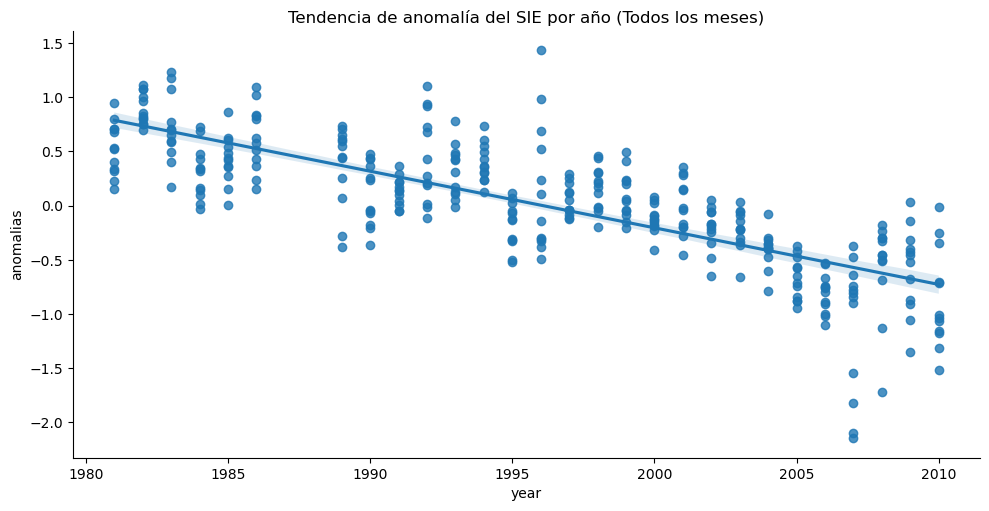

/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


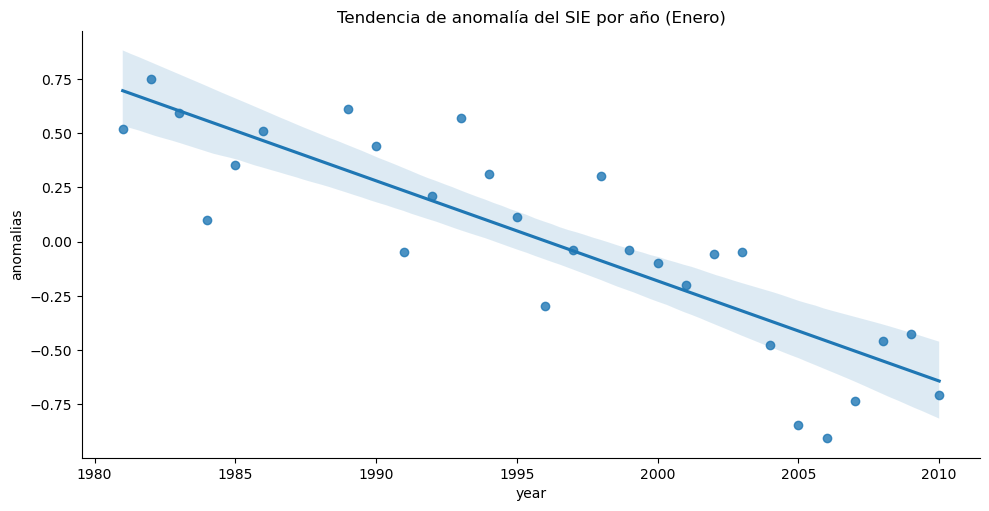

/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


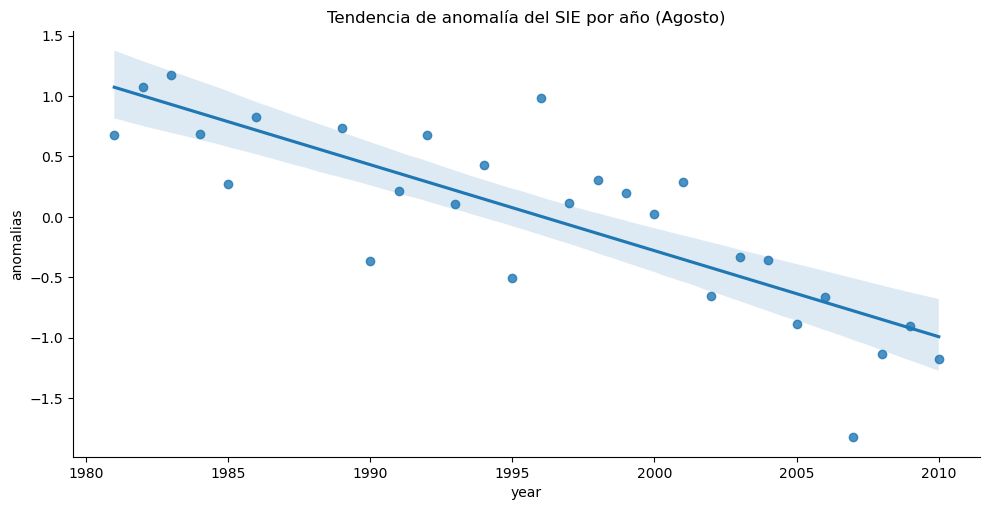

In [268]:
import matplotlib.pyplot as plt

dfSeaIce_81_10.reset_index(inplace=True)

# Para todos los meses
sns.lmplot(x='year', y='anomalias', data=dfSeaIce_81_10, aspect=2)
plt.title('Tendencia de anomalía del SIE por año (Todos los meses)')
plt.show()

# VPor año para enero
sns.lmplot(x='year', y='anomalias', data=dfSeaIce_81_10[dfSeaIce_81_10['mo'] == 1], aspect=2)
plt.title('Tendencia de anomalía del SIE por año (Enero)')
plt.show()

# Por año para agosto
sns.lmplot(x='year', y='anomalias', data=dfSeaIce_81_10[dfSeaIce_81_10['mo'] == 8], aspect=2)
plt.title('Tendencia de anomalía del SIE por año (Agosto)')
plt.show()



### 3. Compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

Provide the estimated parameters for the linear regression.
Evaluate the quality of fit quantitatively and graphically.

const    104.284618
year      -0.052245
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              anomalias   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     529.5
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           7.20e-71
Time:                        23:25:47   Log-Likelihood:                -133.67
No. Observations:                 336   AIC:                             271.3
Df Residuals:                     334   BIC:                             279.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

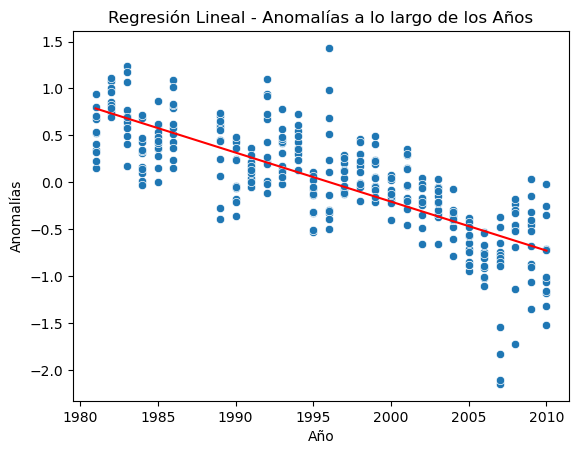

In [271]:
#your solution here

import statsmodels.api as sm

# Regresión lineal OLS
X = dfSeaIce_81_10['year'] 
X = sm.add_constant(X) 
y = dfSeaIce_81_10['anomalias']  

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Parámetros estimados para la regresión lineal
print(modelo.params)

# Calidad del ajuste
print(modelo.summary())

# Grafica
sns.scatterplot(x='year', y='anomalias', data=dfSeaIce_81_10)
plt.plot(dfSeaIce_81_10['year'], modelo.predict(X), color='red')
plt.title('Regresión Lineal - Anomalías a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Anomalías')
plt.show()


Based on your results, what is the trend in the evolution of sea ice extent over recent years?

Hint: the trend is typically expressed in percent per decade (multiply per 10)

<font color='cyan'>Indica una tendencia negativa en la evolución de la extensión del hielo marino a lo largo de los años (Año a año decrece la cantidad de hielo) del 0.522% cada década.</font>


In [ ]:
#your solution here

### 4. Estimate the sea ice extent in the future

Based on the linear trend, make a prediction of SIE for October 2023, October 2025, and October 2030. Compare to September 1979 SIE to estimate the loss (in million square kilometers). For interpretation, note 3.59 million square kilometers is about twice the size of Alaska.

In [283]:
#your solution here

const = 104.2846
trend = -0.0522

def calcular_extension(year):
    return const + trend * year

# Extensión del hielo marino en septiembre de 1979 (suponiendo que conocemos este valor)
extension_1979 = dfSeaIce[(dfSeaIce.index == 1979) & (dfSeaIce['mo'] == 9)]['extent'].values[0]

futuros = [2023, 2025, 2030]

# Calcular y mostrar la extensión del hielo marino predicha para los años futuros
for year in futuros:
    extension_predicha = calcular_extension(year)
    perdida_millones_km2 = extension_1979 - extension_predicha
    print(f"Extensión del hielo marino predicha para octubre de {year}: {extension_predicha:.2f} millones de km2")
    print(f"Pérdida estimada respecto a septiembre de 1979: {perdida_millones_km2:.2f} millones de km2")
    print("---")


Extensión del hielo marino predicha para octubre de 2023: -1.32 millones de km2
Pérdida estimada en comparación con septiembre de 1979: 8.52 millones de km2
---
Extensión del hielo marino predicha para octubre de 2025: -1.42 millones de km2
Pérdida estimada en comparación con septiembre de 1979: 8.62 millones de km2
---
Extensión del hielo marino predicha para octubre de 2030: -1.68 millones de km2
Pérdida estimada en comparación con septiembre de 1979: 8.88 millones de km2
---
